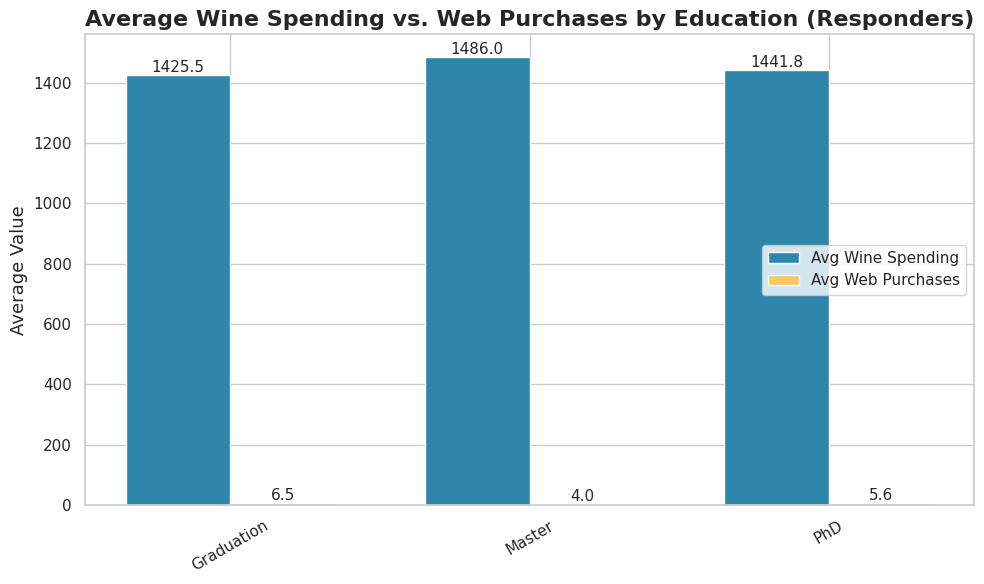

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
url = 'https://raw.githubusercontent.com/Data-Matt0/marketing-campaign-dashboard/refs/heads/main/data/queries/q5_high_spenders_responded.csv'
df = pd.read_csv(url)

# Filter responders only
df = df[df['response'] == 1]

# Aggregate averages by education
agg_df = df.groupby('education').agg({
    'mnt_wines': 'mean',
    'num_web_purchases': 'mean'
}).reset_index()

# Setup
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

bar_width = 0.35
indices = np.arange(len(agg_df))

# Bars for avg wine spending
bars1 = plt.bar(indices, agg_df['mnt_wines'], bar_width, label='Avg Wine Spending', color='#2E86AB')

# Bars for avg web purchases (shifted right)
bars2 = plt.bar(indices + bar_width, agg_df['num_web_purchases'], bar_width, label='Avg Web Purchases', color='#F6C85F')

# Add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=11)

add_labels(bars1)
add_labels(bars2)

# Labels and title
plt.xticks(indices + bar_width / 2, agg_df['education'], rotation=30)
plt.ylabel('Average Value', fontsize=13)
plt.title('Average Wine Spending vs. Web Purchases by Education (Responders)', fontsize=16, weight='bold')
plt.legend()
plt.tight_layout()


# Save figure
plt.savefig('query5_avg_wine_vs_web_purchases_by_education.png', dpi=300, bbox_inches='tight')

plt.show()